# Analytics on Path of Exile League dataset provided by Kaggle user Ggzet
[Link to Kaggle dataset webpage](https://www.kaggle.com/gagazet/path-of-exile-league-statistic)

## Questions posed by dataset uploader:
1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.

## 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data from csv into pandas dataframe

In [2]:
poe_data = pd.read_csv('data/poe_stats.csv')

## 3. Preliminary scanning of dataset and cleaning if necessary

In [3]:
poe_data.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger


In [4]:
poe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
rank          59776 non-null int64
dead          59776 non-null bool
online        59776 non-null bool
name          59776 non-null object
level         59776 non-null int64
class         59776 non-null object
id            59776 non-null object
experience    59776 non-null int64
account       59776 non-null object
challenges    59776 non-null int64
twitch        16300 non-null object
ladder        59776 non-null object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


In [5]:
poe_data.describe()

,rank,level,experience,challenges
count,59776.000000,59776.000000,5.977600e+04,59776.000000
mean,7495.369379,85.422578,1.825786e+09,25.759569
std,4330.179898,11.288017,1.094748e+09,8.440888
min,1.000000,53.000000,7.790982e+07,4.000000
25%,3745.000000,78.000000,7.774697e+08,19.000000
50%,7492.000000,90.000000,1.934010e+09,25.000000
75%,11247.000000,95.000000,2.876117e+09,33.000000
max,15000.000000,100.000000,4.250334e+09,40.000000


Preliminary interpretation of dataset: No significant missing null values other than the twitch field whereas a null value would represent that the player does not have a twitch account linked to his game account.

Step to take: Fill in NaNs in twitch column with 'not a twitch user'

In [6]:
poe_data['twitch'] = poe_data['twitch'].fillna('not a twitch user')

Check column filled dataset to ensure the column twitch has been successfully replaced with desired value

In [7]:
poe_data.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,not a twitch user,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,not a twitch user,Harbinger


In [8]:
poe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
rank          59776 non-null int64
dead          59776 non-null bool
online        59776 non-null bool
name          59776 non-null object
level         59776 non-null int64
class         59776 non-null object
id            59776 non-null object
experience    59776 non-null int64
account       59776 non-null object
challenges    59776 non-null int64
twitch        59776 non-null object
ladder        59776 non-null object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


## 4. Time to answer the questions!

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.

### 4.1: A total number of players in each division, usage of each class in descending order.
Note: The field 'ladder' represents the division the player is in

In [9]:
# Number of players in each division
poe_data['ladder'].value_counts()

SSF Harbinger         14981
SSF Harbinger HC      14972
Harbinger             14918
Hardcore Harbinger    14905
Name: ladder, dtype: int64

In [10]:
# Usage of each class in descending order (overall)
poe_data['class'].value_counts()

Berserker       8711
Necromancer     7077
Slayer          5485
Raider          5150
Gladiator       4900
Pathfinder      4239
Ascendant       3754
Inquisitor      3391
Trickster       3058
Chieftain       2130
Juggernaut      2030
Hierophant      1725
Elementalist    1326
Saboteur        1281
Occultist       1232
Champion        1216
Guardian        1177
Deadeye          719
Assassin         679
Witch            119
Marauder          95
Templar           71
Duelist           65
Scion             52
Ranger            48
Shadow            46
Name: class, dtype: int64

In [11]:
# Usage of each class in descending order by division
for division in poe_data['ladder'].unique():
    temp_data = poe_data[poe_data['ladder'] == division]
    print(f"{division} division classes' usage\n"
         f"{temp_data['class'].value_counts()}\n")

Harbinger division classes' usage
Pathfinder      3428
Berserker       2713
Raider          1943
Slayer          1706
Necromancer     1207
Ascendant        740
Gladiator        648
Inquisitor       559
Guardian         349
Chieftain        291
Trickster        211
Elementalist     193
Juggernaut       187
Saboteur         177
Occultist        151
Champion         126
Assassin         108
Hierophant       102
Deadeye           79
Name: class, dtype: int64

SSF Harbinger HC division classes' usage
Necromancer     2055
Berserker       1644
Gladiator       1576
Slayer          1135
Trickster       1058
Inquisitor      1052
Ascendant        865
Raider           826
Juggernaut       734
Chieftain        693
Hierophant       668
Elementalist     432
Occultist        413
Saboteur         393
Champion         338
Assassin         225
Deadeye          193
Pathfinder       159
Guardian         101
Witch             98
Marauder          84
Templar           65
Duelist           55
Scion           

### 4.2 2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?

In [12]:
# Split dataset into sub-datasets of twitch streamers and non-twitch streamers
twitch = poe_data[poe_data['twitch'] != 'not a twitch user']
n_twitch = poe_data[poe_data['twitch'] == 'not a twitch user']

In [13]:
# Comparison by average ranking
print(f'twitch players average ranking: {twitch["rank"].mean()}')
print(f'non-twitch player average ranking: {n_twitch["rank"].mean()}')

twitch players average ranking: 7101.554355828221
non-twitch player average ranking: 7643.018308952065


In [14]:
# Comparison by character status (dead or alive), absolute values
print(f'twitch players character status:\n{twitch["dead"].value_counts()}\n')
print(f'non-twitch players character status:\n{n_twitch["dead"].value_counts()}\n')
      
# Character status by proportion (dead): lower the better for True, higher the better for False
print(f'twitch players character status:\n{twitch["dead"].value_counts(normalize=True)}\n')
print(f'non-twitch players character status:\n{n_twitch["dead"].value_counts(normalize=True)}\n')

twitch players character status:
False    10250
True      6050
Name: dead, dtype: int64

non-twitch players character status:
False    28945
True     14531
Name: dead, dtype: int64

twitch players character status:
False    0.628834
True     0.371166
Name: dead, dtype: float64

non-twitch players character status:
False    0.66577
True     0.33423
Name: dead, dtype: float64



In [15]:
# Comparison by average number of challenges completed, higher the better
print(f'twitch players average number of challenges completed: {twitch["challenges"].mean()}')
print(f'non-twitch player average number of challenges completed: {n_twitch["challenges"].mean()}')

twitch players average number of challenges completed: 28.32521472392638
non-twitch player average number of challenges completed: 24.79765847824087


Twitch streamers tend to play better than non-streamers based on average ranking and average number of challenges completed. However, twitch streamers have a higher proportion of dead characters than non-twitch players

In [16]:
# Twitch players who are worse than average non-twitch player based on ranking
worse_twitch_rank = twitch[twitch['rank'] > n_twitch['rank'].mean()]
print(f'Number of worse twitch players by ranking: {len(worse_twitch_rank)}')
print(f'Proportion of worse twitch players amongst all twitch players by ranking: {len(worse_twitch_rank)/len(twitch):.2f}')

Number of worse twitch players by ranking: 7437
Proportion of worse twitch players amongst all twitch players by ranking: 0.46


In [17]:
# Preview of worse twitch players by ranking
worse_twitch_rank.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
30492,7644,True,False,PlayerUnknownsCAMGirl,91,Berserker,83da9d7068e9aa2be4223410d366a934f351ca2709e829...,2120368299,Cadenza,34,ixcadenza,Hardcore Harbinger
30496,7645,False,False,HanaWasps,83,Assassin,d0468d363cbe79fac39d01e0cf9f0d461fd05db54ada05...,1114981728,hannarashi,21,hanarashi,SSF Harbinger
30497,7645,True,False,Noreal_xviii,91,Ascendant,e93c4d8dfb7798080303ba2824f984c2637bfb7b8bdc3a...,2120251102,noreal81,25,noreal81,Hardcore Harbinger
30500,7646,False,False,GolemciBeybi,95,Necromancer,bfa08702949462df91af2068b2f409f6cc77980440e819...,2920749524,Oymaygad,25,sentorio,Harbinger
30502,7647,False,False,HarSixteen,71,Inquisitor,3b2fccb08e227ed0a75330706146f9c5480719969a1c17...,400076657,Tiendi,11,contestant13,SSF Harbinger HC


In [18]:
# Twitch players who are worse than average non-twitch player based on number of challenges completed
worse_twitch_challenges = twitch[twitch['challenges'] > n_twitch['challenges'].mean()]
print(f'Number of worse twitch players by number of challenges completed: {len(worse_twitch_challenges)}')
print(f'Proportion of worse twitch players amongst all twitch players by number of challenges completed: {len(worse_twitch_challenges)/len(twitch):.2f}')

Number of worse twitch players by number of challenges completed: 10791
Proportion of worse twitch players amongst all twitch players by number of challenges completed: 0.66


In [19]:
# Preview of worse twitch players by number of challenges completed
worse_twitch_challenges.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger


### 4.3 Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
Note: Assumption that predicting chance is equivalent to the proportion of necromancers in top 30.

In [20]:
# Chance of necromancer to be in top 30 for each division
for division in poe_data['ladder'].unique():
    temp_data = poe_data[(poe_data['ladder'] == division) & (poe_data['rank'] <= 30)]
    print(f"{division} division chance (proportion) of necromancer in top 30\n"
         f"{(temp_data['class'].value_counts()['Necromancer'])/30:.2f}\n")

Harbinger division chance (proportion) of necromancer in top 30
0.20

SSF Harbinger HC division chance (proportion) of necromancer in top 30
0.37

Hardcore Harbinger division chance (proportion) of necromancer in top 30
0.20

SSF Harbinger division chance (proportion) of necromancer in top 30
0.20



### 4.4. Average number of finished challanges for each division, show division with highest and lowest average challanges.

In [21]:
for division in poe_data['ladder'].unique():
    temp_data = poe_data[poe_data['ladder'] == division]
    print(f'{division} division average number of finished challenges: {temp_data.challenges.mean():.2f}')

Harbinger division average number of finished challenges: 33.47
SSF Harbinger HC division average number of finished challenges: 20.29
Hardcore Harbinger division average number of finished challenges: 27.17
SSF Harbinger division average number of finished challenges: 22.15


In [22]:
# Another approach
poe_data[['ladder', 'challenges']].groupby('ladder').agg('mean')

,challenges
ladder,
Harbinger,33.472181
Hardcore Harbinger,27.168668
SSF Harbinger,22.146719
SSF Harbinger HC,20.287002


### 4.5. Show dependency between level and class of died characters. Only for HC divisions.

In [23]:
# filter to only have hc division
hc_level_class_dead = poe_data[(poe_data['ladder'] == 'SSF Harbinger HC') & (poe_data['dead'] == True)][['level', 'class']].reset_index(drop=True)
hc_level_class_dead.head()

,level,class
0,100,Raider
1,100,Necromancer
2,99,Necromancer
3,99,Slayer
4,98,Necromancer


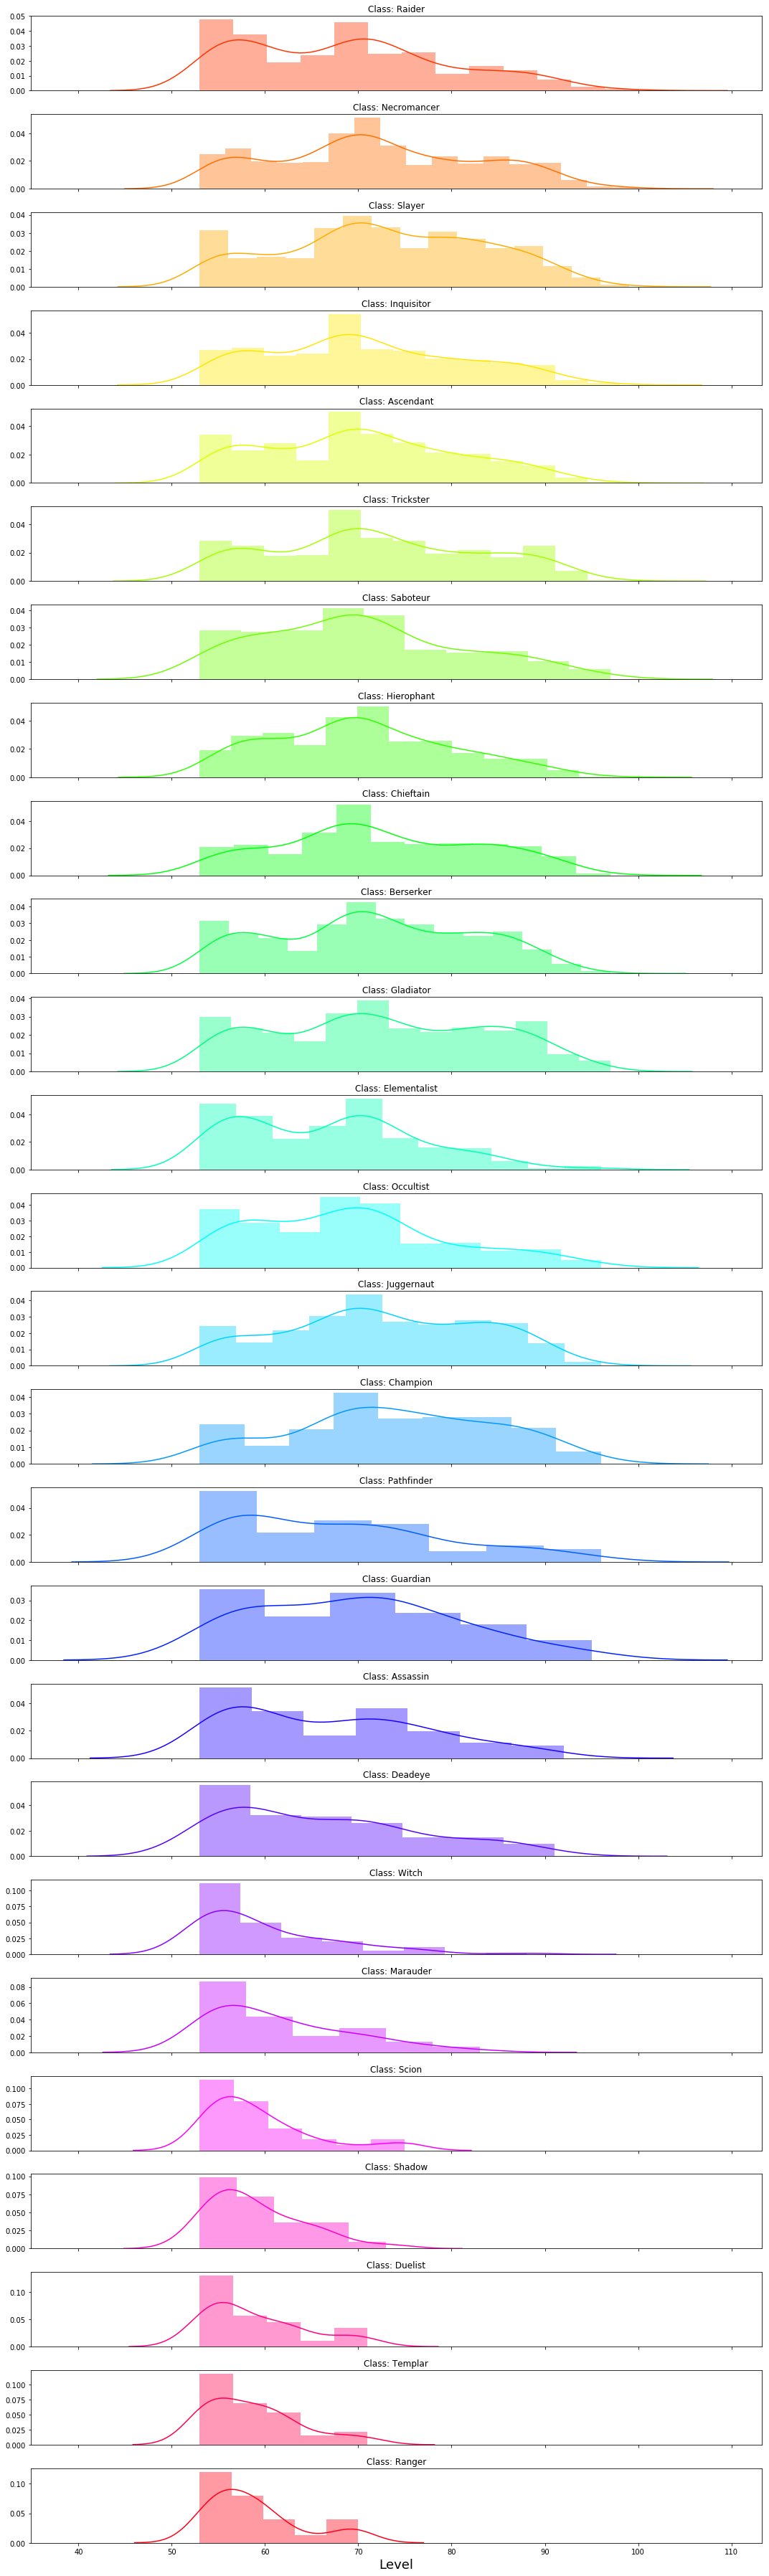

In [24]:
# distribution plots of classes of dead characters
num_classes = hc_level_class_dead['class'].nunique()
factor = 1.0/num_classes
cmap = matplotlib.cm.get_cmap('hsv')

fig, ax = plt.subplots(num_classes, 1, figsize=(15,50), sharex=True)
for index, poe_class in enumerate(hc_level_class_dead['class'].unique()):
    class_data = hc_level_class_dead[hc_level_class_dead['class'] == poe_class]['level']
    sns.distplot(class_data, ax=ax[index], color=cmap((index+1)*factor)).set_title(f'Class: {poe_class}')
    ax[index].set(xlabel='')

plt.xlabel('Level', fontsize=18)
plt.tight_layout()